In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, jaccard_score, log_loss
%matplotlib inline

### PROJECT OVERVIEW

When a customer applies for a loan, banks and other credit providers use statistical models to determine whether or not to grant the loan based on the likelihood of the loan being repaid. The factors involved in determining this likelihood are complex, and extensive statistical analysis and modeling are required to predict the outcome for each individual case.

Used Machine Learning models DecisionTreeClassifier, RandomForestClassifier, Naive bayes and selected the best suited model on the basis of accuracy score for the prediction.

In [5]:
df = pd.read_csv('Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.shape

(614, 13)

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Data Cleaning

In [71]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Loan_ID
Loan_ID
False    614
Name: count, dtype: int64

Gender
Gender
False    601
True      13
Name: count, dtype: int64

Married
Married
False    611
True       3
Name: count, dtype: int64

Dependents
Dependents
False    599
True      15
Name: count, dtype: int64

Education
Education
False    614
Name: count, dtype: int64

Self_Employed
Self_Employed
False    582
True      32
Name: count, dtype: int64

ApplicantIncome
ApplicantIncome
False    614
Name: count, dtype: int64

CoapplicantIncome
CoapplicantIncome
False    614
Name: count, dtype: int64

LoanAmount
LoanAmount
False    592
True      22
Name: count, dtype: int64

Loan_Amount_Term
Loan_Amount_Term
False    600
True      14
Name: count, dtype: int64

Credit_History
Credit_History
False    564
True      50
Name: count, dtype: int64

Property_Area
Property_Area
False    614
Name: count, dtype: int64

Loan_Status
Loan_Status
False    614
Name: count, dtype: int64



### Replacing the missing values in Gender Column with the most common value

In [22]:
set(df['Gender'])

{'Female', 'Male', nan}

In [24]:
gender_mode = df['Gender'].value_counts().idxmax()
gender_mode

'Male'

In [26]:
df['Gender'].replace(np.nan, gender_mode, inplace=True)

### Replacing the missing values in Gender Column with the most common value

In [29]:
set(df['Married'])

{'No', 'Yes', nan}

In [31]:
married_max = df['Married'].value_counts().idxmax()
married_max

'Yes'

In [33]:
df['Married'].replace(np.nan, married_max, inplace=True)

### Replacing the missing values in Dependents Column with the most common value

In [36]:
set(df['Dependents'])

{'0', '1', '2', '3+', nan}

In [38]:
Dependents_max = df['Dependents'].value_counts().idxmax()
Dependents_max

'0'

In [40]:
df['Dependents'].replace(np.nan, Dependents_max, inplace=True)

### Replacing the missing values in Self_Employed Column with the most common value

In [43]:
set(df['Self_Employed'])

{'No', 'Yes', nan}

In [45]:
Self_Employed_max = df['Self_Employed'].value_counts().idxmax()
Self_Employed_max

'No'

In [47]:
df['Self_Employed'].replace(np.nan, Self_Employed_max, inplace=True)

### Replacing the missing values in LoanAmount Column with the mean value

In [50]:
# set(df['LoanAmount'])

In [52]:
LoanAmount_mean = df['LoanAmount'].mean()
LoanAmount_mean_rounded = round(LoanAmount_mean, 1)
LoanAmount_mean_rounded

146.4

In [54]:
df['LoanAmount'].replace(np.nan, LoanAmount_mean_rounded, inplace=True)

### Replacing the missing values in Loan_Amount_Term Column with the most common value

In [57]:
# set(df['Loan_Amount_Term'])

In [59]:
Loan_Amount_Term_max = df['Loan_Amount_Term'].value_counts().idxmax()
Loan_Amount_Term_max

360.0

In [61]:
df['Loan_Amount_Term'].replace(np.nan, Loan_Amount_Term_max, inplace=True)

### Replacing the missing values in Credit_History Column with the most common value

In [64]:
# set(df['Credit_History'])

In [66]:
Credit_History_max = df['Credit_History'].value_counts().idxmax()
Credit_History_max

1.0

In [68]:
df['Credit_History'].replace(np.nan, Credit_History_max, inplace=True)

In [73]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [78]:
df[["ApplicantIncome"]] = df[["ApplicantIncome"]].astype("float")

In [80]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Exploratory Data Analysis

In [84]:
df.corr(numeric_only='False')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187829,-0.059383,0.011134
LoanAmount,0.565620,0.187829,1.000000,0.036475,-0.001430
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001430,-0.004705,1.000000


(0.0, 85042.5)

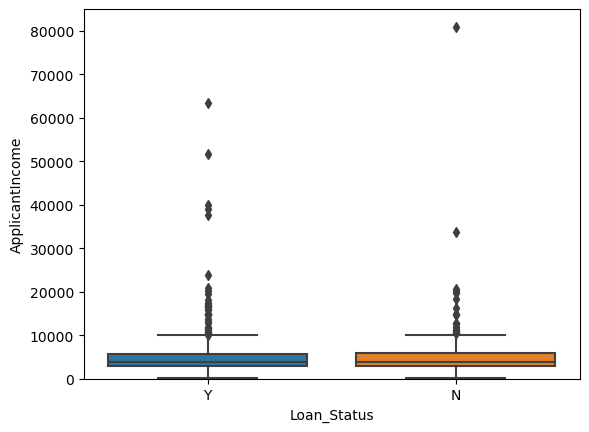

In [86]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)
plt.ylim(0,)


(0.0, 43750.35)

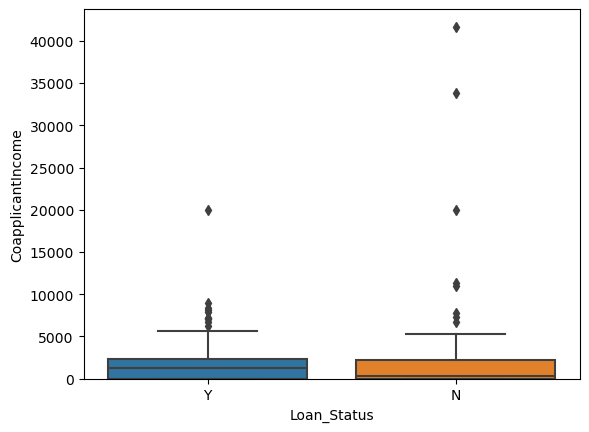

In [88]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=df)
plt.ylim(0,)

(0.0, 734.55)

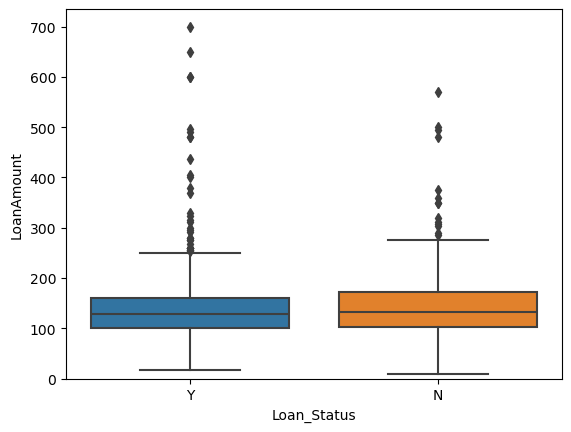

In [90]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df)
plt.ylim(0,)

(0.0, 85042.5)

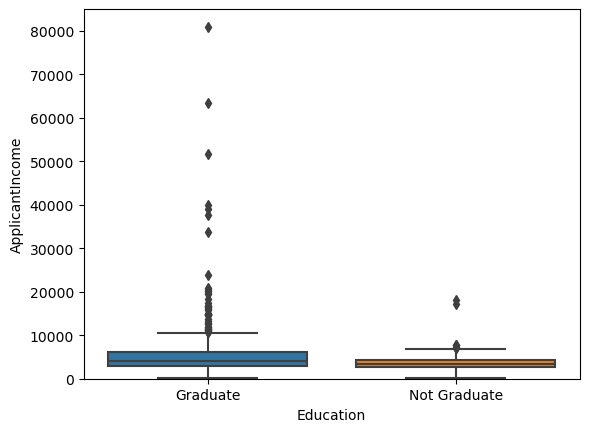

In [92]:
sns.boxplot(x="Education", y="ApplicantIncome", data=df)
plt.ylim(0,)

### Data Normalization

<Axes: >

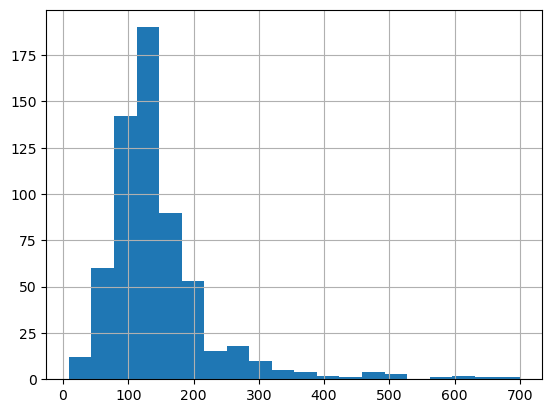

In [97]:
df['LoanAmount'].hist(bins=20)

<Axes: >

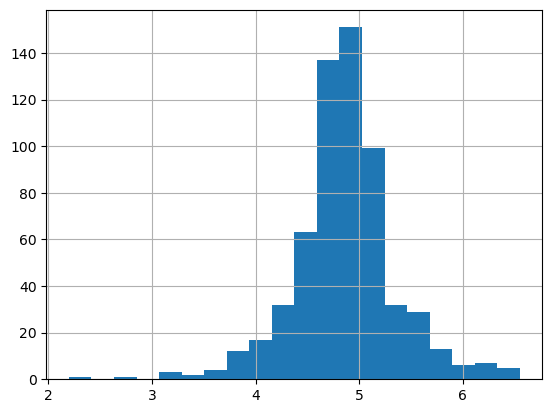

In [99]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<Axes: >

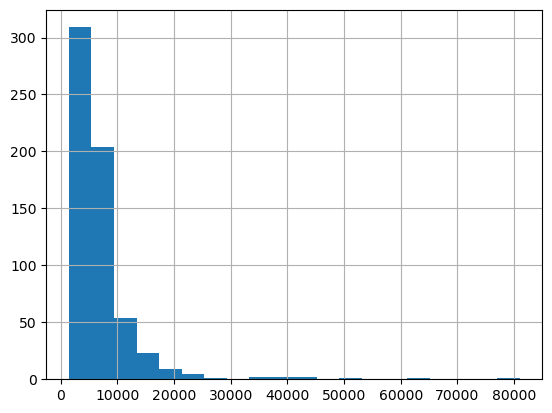

In [101]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'].hist(bins=20)

<Axes: >

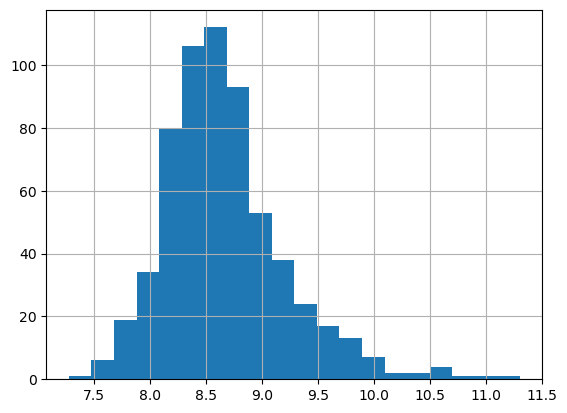

In [103]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [105]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.4,360.0,1.0,Urban,Y,4.986343,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


## Data Pre Processing

In [109]:
X = df.iloc[:,np.r_[1:5, 9:11, 13:15]].values
Y = df.iloc[:,12].values

In [111]:
X

array([['Male', 'No', '0', ..., 1.0, 4.986342601527212, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [113]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

### Training Data and Test Data

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0) 

In [119]:
x_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517, 11250.0],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)

In [121]:
labelencoder_x = LabelEncoder()
for i in range(0,5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])

In [123]:
x_train[0]

array([1, 1, 0, 0, 7, 1.0, 4.875197323201151, 5858.0], dtype=object)

In [125]:
x_train[:,7] = labelencoder_x.fit_transform(x_train[:,7])

In [127]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [129]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [131]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [133]:
labelencoder_x = LabelEncoder()
for i in range(0,5):
    x_test[:,i] = labelencoder_x.fit_transform(x_test[:,i])

In [135]:
x_test[:,7] = labelencoder_x.fit_transform(x_test[:,7])

In [137]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [139]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [195]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [144]:
SS = StandardScaler()
x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [146]:
x_train[0]

array([ 0.47374983,  0.71143163, -0.76304669, -0.53102197,  0.29835867,
        0.41790088,  0.02444209,  0.29186348])

In [148]:
x_test[0]

array([ 0.46671381, -1.25      , -0.64059361, -0.51772699,  0.29935278,
        0.3866946 , -0.94820357,  0.73262333])

## MODEL DEVELOPMENT

### Decision Tree Classifier
A decision tree is a type of supervised learning algorithm that is commonly used in machine learning to model and predict outcomes based on input data. It is a tree-like structure where each internal node tests on attribute, each branch corresponds to attribute value and each leaf node represents the final decision or prediction. The decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems

#### Modeling

In [197]:
DTC = DecisionTreeClassifier(criterion="entropy", random_state=0)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Prediction

In [200]:
tree_pred = DTC.predict(x_test)
tree_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [202]:
print(tree_pred[:10])
print(y_test[:10])

[0 1 0 1 1 1 1 1 0 1]
[1 0 1 0 1 0 1 1 0 1]


#### Accuracy Check

In [205]:
Tree_Accuracy_Score = accuracy_score(y_test, tree_pred)
Tree_JaccardIndex = jaccard_score(y_test, tree_pred)
Tree_F1_Score = f1_score(y_test, tree_pred)
Tree_Log_Loss = log_loss(y_test, tree_pred)
print("Tree accur_acy score: ", Tree_Accuracy_Score)
print("Tree JaccardIndex : ", Tree_JaccardIndex)
print("Tree_F1_Score : ", Tree_F1_Score)
print("Tree Log Loss : ", Tree_Log_Loss)

Tree accur_acy score:  0.6991869918699187
Tree JaccardIndex :  0.6442307692307693
Tree_F1_Score :  0.783625730994152
Tree Log Loss :  10.84239979997833


## Gaussian Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

In [167]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train, y_train)

GaussianNB()

In [169]:
NBC_pred = NBC.predict(x_test)

In [171]:
NBC_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [173]:
print(y_test[:10])
print(NBC_pred[:10])

[1 0 1 0 1 0 1 1 0 1]
[1 1 1 1 1 0 1 1 0 1]


In [175]:
naive_bayes_Accuracy_Score = accuracy_score(y_test, NBC_pred)
naive_bayes_JaccardIndex = jaccard_score(y_test, NBC_pred)
naive_bayes_F1_Score = f1_score(y_test, NBC_pred)
naive_bayes_Log_Loss = log_loss(y_test, NBC_pred)
print("Tree accur_acy score: ", naive_bayes_Accuracy_Score)
print("Tree JaccardIndex : ", naive_bayes_JaccardIndex)
print("Tree_F1_Score : ", naive_bayes_F1_Score)
print("Tree Log Loss : ", naive_bayes_Log_Loss)

Tree accur_acy score:  0.8292682926829268
Tree JaccardIndex :  0.8073394495412844
Tree_F1_Score :  0.8934010152284264
Tree Log Loss :  6.153794481068783


### Random Forest Classifier

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

In [178]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [180]:
RFC_pred = RFC.predict(x_test)

In [182]:
RFC_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [184]:
print(y_test[:10])
print(RFC_pred[:10])

[1 0 1 0 1 0 1 1 0 1]
[1 1 0 1 1 0 1 0 0 1]


In [186]:
Random_Forest_Accuracy_Score = accuracy_score(y_test, RFC_pred)
Random_Forest_JaccardIndex = jaccard_score(y_test, RFC_pred)
Random_Forest_F1_Score = f1_score(y_test, RFC_pred)
Random_Forest_Log_Loss = log_loss(y_test, RFC_pred)
print("Tree accur_acy score: ", Random_Forest_Accuracy_Score)
print("Tree JaccardIndex : ", Random_Forest_JaccardIndex)
print("Tree_F1_Score : ", Random_Forest_F1_Score)
print("Tree Log Loss : ", Random_Forest_Log_Loss)

Tree accur_acy score:  0.7886178861788617
Tree JaccardIndex :  0.7570093457943925
Tree_F1_Score :  0.8617021276595744
Tree Log Loss :  7.618983643228017


### Compairing the Models - based on scores

In [218]:
Algorithms = ['Decision Tree Classifier', 'Gaussian Naive Bayes', 'Random Forest Classifier']

Accuracy_Score = [Tree_Accuracy_Score, naive_bayes_Accuracy_Score, Random_Forest_Accuracy_Score]

F1_Score = [Tree_F1_Score, naive_bayes_F1_Score, Random_Forest_F1_Score]

column_names = ['Algorithm', 'Accuracy Score', 'F1_Score']

In [220]:
df = pd.DataFrame(list(zip(Algorithms, Accuracy_Score, F1_Score)),columns = column_names)
df

,Algorithm,Accuracy Score,F1_Score
0,Decision Tree Classifier,0.699187,0.783626
1,Gaussian Naive Bayes,0.829268,0.893401
2,Random Forest Classifier,0.788618,0.861702


C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


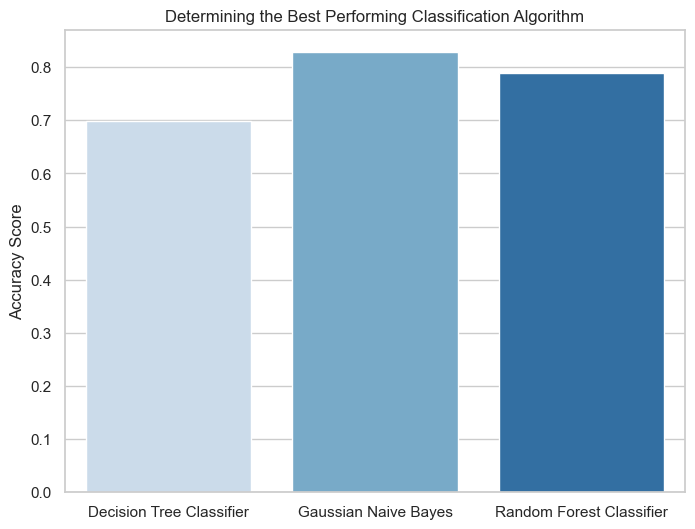

In [228]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.barplot(x=Algorithms, y=Accuracy_Score, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

## ==> INFERENCE

Based on the above comparison of the models, its clear that **NAIVE BAYES CLASSIFIER** produces more accurate predictions.
Hence, we are going to predict the unknown loan eligibilty of the new dataset which deosn't have the loan status column using Naive Bayes Algorithm

### Applying the Naive Bayes Model

In [284]:
df_test = pd.read_csv('loan-test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Repeating the Data Cleaning, EDA and Data Pre-Processing steps

In [286]:
df_test.shape

(367, 12)

In [288]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [290]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [292]:
gender_mode = df_test['Gender'].value_counts().idxmax()
df_test['Gender'].replace(np.nan, gender_mode, inplace=True)

In [294]:
Dependents_max = df_test['Dependents'].value_counts().idxmax()
df_test['Dependents'].replace(np.nan, Dependents_max, inplace=True)

In [296]:
Self_Employed_max = df_test['Self_Employed'].value_counts().idxmax()
df_test['Self_Employed'].replace(np.nan, Self_Employed_max, inplace=True)

In [298]:
Credit_History_max = df_test['Credit_History'].value_counts().idxmax()
df_test['Credit_History'].replace(np.nan, Credit_History_max, inplace=True)

In [300]:
LoanAmount_mean = df_test['LoanAmount'].mean()
LoanAmount_mean_rounded = round(LoanAmount_mean, 1)
df_test['LoanAmount'].replace(np.nan, LoanAmount_mean_rounded, inplace=True)

In [302]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

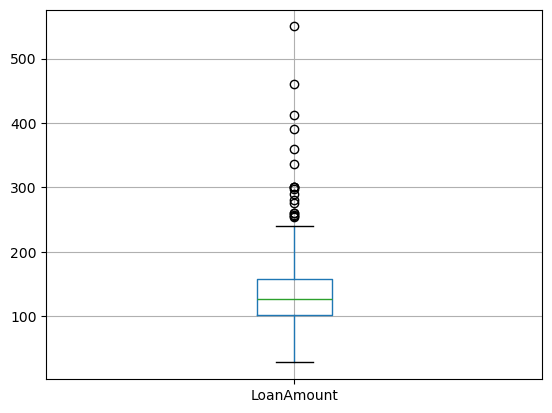

In [304]:
df_test.boxplot(column='LoanAmount')

<Axes: >

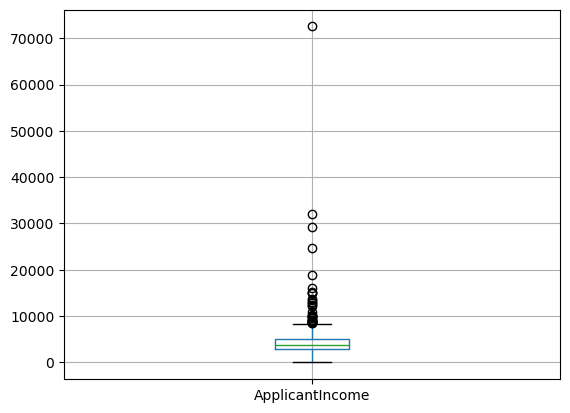

In [306]:
df_test.boxplot(column='ApplicantIncome')

In [308]:
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

<Axes: >

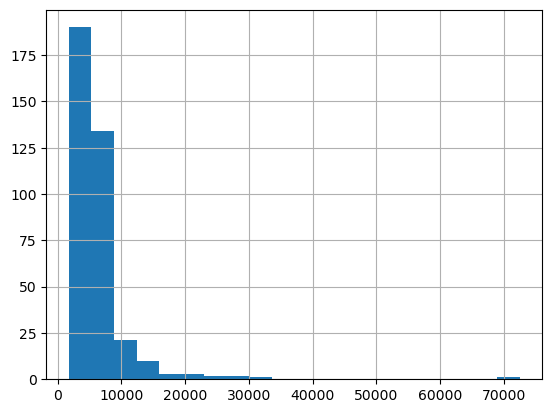

In [318]:
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['TotalIncome'].hist(bins=20)

In [322]:
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])

In [324]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [326]:
test = df_test.iloc[:,np.r_[1:5, 9:11, 13:15]].values

In [328]:
labelencoder_x = LabelEncoder()
for i in range(0,5):
    test[:,i] = labelencoder_x.fit_transform(test[:,i])

In [330]:
test[:,7] = labelencoder_x.fit_transform(test[:,7])

In [336]:
test

array([[ 0.48547939,  0.75835829, -0.75822199, ...,  0.4376739 ,
        -0.12618159,  0.34823304],
       [ 0.48547939,  0.75835829,  0.18187082, ...,  0.4376739 ,
        -0.34650636, -0.48766346],
       [ 0.48547939,  0.75835829,  1.12196363, ...,  0.4376739 ,
         0.08181731,  0.79135889],
       ...,
       [ 0.48547939, -1.31863792, -0.75822199, ...,  0.4376739 ,
        -0.21804778,  0.01588865],
       [ 0.48547939,  0.75835829, -0.75822199, ...,  0.4376739 ,
         0.19602411,  0.96256661],
       [ 0.48547939, -1.31863792, -0.75822199, ...,  0.4376739 ,
         0.54403709,  1.39562142]])

In [334]:
test = SS.fit_transform(test)

## FINAL PREDICTION

In [338]:
Final_pred = NBC.predict(test)
Final_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

The above is the final required predicted outcome using Naive Bayes Model.